In [1]:
import keras
from keras import backend as K
from keras import layers, regularizers, callbacks
from keras.models import load_model

import tensorflow as tf
import random

import numpy as np
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, hamming_loss

import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
tf.__version__

'2.2.0'

In [4]:
random.seed(42)

# version check

In [5]:
version = 'v1'

# label load

In [6]:
train_X = pd.read_excel('./data/paper_train.xlsx')
train_X = train_X.drop(['Unnamed: 0', 'abstract'], axis=1)
train_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
val_X = pd.read_excel('./data/paper_val.xlsx')
val_X = val_X.drop(['Unnamed: 0', 'abstract'], axis=1)
val_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_X = pd.read_excel('./data/paper_test.xlsx')
test_X = test_X.drop(['Unnamed: 0', 'abstract'], axis=1)
test_X

,3D프린팅,4차산업,4차산업혁명,STEAM교육,가상현실,감성,감성분석,감정,강한인공지능,강화학습,...,핀테크,학습,학습동기,학습성과,학업성취도,합성곱신경망,핵심역량,헬스케어,혁신,협업
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
one_hot_train_labels = np.array(train_X)
one_hot_train_labels
print(one_hot_train_labels.shape)

one_hot_val_labels = np.array(val_X)
one_hot_val_labels
print(one_hot_val_labels.shape)

one_hot_test_labels = np.array(test_X)
one_hot_test_labels
print(one_hot_test_labels.shape)

(2805, 262)
(935, 262)
(935, 262)


# trained model load

In [10]:
encoder = load_model('./weights/residual_encoder_ls16_{}.h5'.format(version))
decoder = load_model('./weights/residual_decoder_ls16_{}.h5'.format(version))

C:\Users\user\.conda\envs\mlc\lib\site-packages\keras\engine\saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


### train data

In [11]:
train_encode = encoder.predict(one_hot_train_labels)
train_encode

array([[7.4005003 , 0.7939675 , 2.4942389 , ..., 1.2844495 , 4.9380364 ,
        1.5477171 ],
       [0.28322086, 0.        , 1.9666965 , ..., 0.        , 5.345977  ,
        1.5251302 ],
       [3.3340635 , 3.7846472 , 3.7033048 , ..., 4.3865204 , 3.5492303 ,
        0.3838412 ],
       ...,
       [4.194004  , 2.4532614 , 1.6477116 , ..., 3.6191564 , 2.4538531 ,
        0.03855107],
       [3.9157622 , 0.5509865 , 2.6660035 , ..., 3.1283383 , 3.4797456 ,
        3.6229975 ],
       [5.4021153 , 6.2467246 , 2.2369246 , ..., 2.0578244 , 3.992243  ,
        0.        ]], dtype=float32)

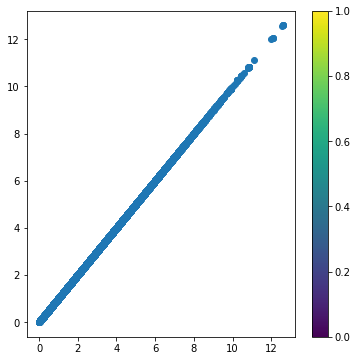

In [12]:
plt.figure(figsize=(6, 6))
plt.scatter(train_encode[:, :], train_encode[:, :])
plt.colorbar()
plt.show()

In [13]:
train_encode_df = pd.DataFrame(train_encode)
train_encode_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7.400500,0.793967,2.494239,0.0,8.407842,6.835240,5.448450,3.640915,5.075698,2.362760,4.594933,4.380576,5.947162,1.284449,4.938036,1.547717
1,0.283221,0.000000,1.966697,0.0,1.120683,1.474833,1.177635,1.103740,3.678716,3.653130,3.246857,3.516527,3.723137,0.000000,5.345977,1.525130
2,3.334064,3.784647,3.703305,0.0,6.005097,5.966960,5.604037,4.534294,0.569795,8.734940,5.818432,2.395892,2.674205,4.386520,3.549230,0.383841
3,1.383306,0.000000,0.593685,0.0,2.319890,1.390207,2.974515,0.794156,4.410546,2.164357,3.124495,4.687232,0.307596,2.351454,2.308253,4.721750
4,1.975997,2.589316,2.528453,0.0,2.549310,5.451760,1.901620,4.162091,2.070534,5.313060,4.051775,2.426169,3.152489,2.327195,4.600359,0.543529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,3.692484,1.169623,4.043570,0.0,4.896584,3.824366,5.341949,2.289419,1.556468,4.329239,4.731332,2.103086,2.979902,4.638704,1.538957,2.240425
2801,1.485891,2.260214,0.871972,0.0,3.113371,3.870273,0.000000,4.537723,1.432606,8.612232,6.365145,0.624376,0.279052,2.504393,1.611161,4.503639
2802,4.194004,2.453261,1.647712,0.0,4.419639,6.381796,3.689257,3.816385,2.300622,1.321825,1.816383,3.222968,2.310107,3.619156,2.453853,0.038551
2803,3.915762,0.550987,2.666003,0.0,6.212716,4.921995,3.173324,4.325376,3.989880,3.104712,4.521141,3.282028,3.189968,3.128338,3.479746,3.622998


In [14]:
train_encode_df.to_excel('./rae_ls16_{}_latent_vector_train.xlsx'.format(version))

In [15]:
train_decode = decoder.predict(train_encode)
train_decode

array([[4.65357836e-10, 2.57402935e-08, 9.51809847e-18, ...,
        3.20915983e-09, 6.53232487e-14, 5.65702548e-16],
       [7.66567643e-11, 8.12698388e-04, 6.38408987e-12, ...,
        1.90293514e-09, 5.94261955e-08, 4.29636246e-04],
       [5.35838091e-14, 2.15980823e-15, 1.31211820e-26, ...,
        5.56616493e-13, 1.26707675e-17, 2.80739499e-15],
       ...,
       [4.61857979e-07, 4.30020890e-08, 3.14546347e-16, ...,
        6.16377207e-08, 7.62534727e-17, 6.13310014e-10],
       [1.96770822e-09, 1.39737886e-05, 1.17756857e-12, ...,
        8.80215794e-06, 7.02393308e-08, 2.05922812e-09],
       [3.03768419e-15, 3.33538475e-11, 1.77981713e-24, ...,
        5.67196601e-09, 1.29721286e-18, 8.29629930e-13]], dtype=float32)

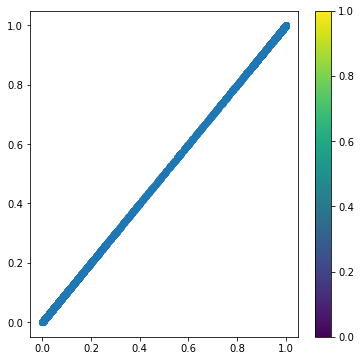

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(train_decode[:, :], train_decode[:, :])
plt.colorbar()
plt.show()

In [17]:
train_predict = train_decode.round()
train_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
"""train_predict = np.where(train_decode > 0.5, 1, 0)
train_predict"""

'train_predict = np.where(train_decode > 0.5, 1, 0)\ntrain_predict'

In [19]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [20]:
#c_matrix.shape

In [21]:
#c_matrix

In [22]:
print('accuracy : ', accuracy_score(one_hot_train_labels, train_predict))
print('precision : ', precision_score(one_hot_train_labels, train_predict, average='micro'))
print('recall : ', recall_score(one_hot_train_labels, train_predict, average='micro'))
print('f1 : ', f1_score(one_hot_train_labels, train_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_train_labels, train_predict))

accuracy :  0.9226381461675579
precision :  0.9773160907356371
recall :  0.9648388447048974
f1 :  0.9710373880989994
------------------------
hamming_loss :  0.000374195479718605


In [23]:
train_predict_df = pd.DataFrame(train_predict)
train_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#train_predict_df.to_excel('./train_latent_vector.xlsx')

### validation data

In [25]:
val_encode = encoder.predict(one_hot_val_labels)
val_encode

array([[2.7160554 , 2.2463284 , 1.9189415 , ..., 1.6722131 , 1.2154307 ,
        0.20074283],
       [0.18817873, 3.7567754 , 1.7368749 , ..., 0.7061405 , 4.232432  ,
        0.        ],
       [1.6480557 , 2.060825  , 0.        , ..., 0.        , 6.739432  ,
        2.534535  ],
       ...,
       [4.169472  , 0.55226487, 0.25817007, ..., 1.4647906 , 1.942145  ,
        3.6061165 ],
       [3.1669865 , 0.69811475, 5.117628  , ..., 1.429339  , 3.2336457 ,
        0.35334483],
       [1.3833063 , 0.        , 0.59368443, ..., 2.351454  , 2.3082526 ,
        4.72175   ]], dtype=float32)

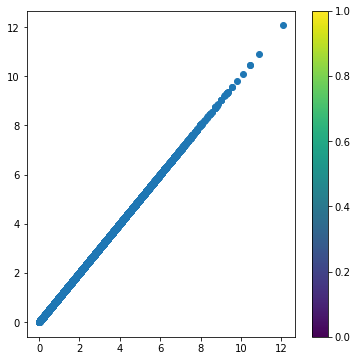

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(val_encode[:, :], val_encode[:, :])
plt.colorbar()
plt.show()

In [27]:
val_encode_df = pd.DataFrame(val_encode)
val_encode_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.716055,2.246328,1.918941,0.0,2.945909,1.523503,2.509283,0.978781,0.768399,3.411678,3.204705,0.416470,1.516029,1.672213,1.215431,0.200743
1,0.188179,3.756775,1.736875,0.0,3.436574,3.219394,0.987233,3.927560,0.000000,4.260923,1.117349,1.463253,2.272121,0.706141,4.232432,0.000000
2,1.648056,2.060825,0.000000,0.0,2.037456,1.674707,3.980412,0.422224,0.719849,3.312828,2.600056,4.113280,2.516047,0.000000,6.739432,2.534535
3,4.328513,1.414919,0.000000,0.0,2.815947,6.402259,1.192407,1.220185,2.057673,1.984623,2.425230,5.916327,3.905957,1.388042,3.977381,1.887881
4,4.168389,1.664589,4.663027,0.0,6.650980,2.538317,0.406455,2.719093,2.570816,6.136378,6.868094,0.943375,3.902693,3.402886,0.723340,3.636968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,4.355027,1.190150,2.025228,0.0,4.644762,4.315496,3.297051,2.216343,3.499756,3.984107,5.204399,4.898787,5.794420,0.995206,6.614484,3.523954
931,3.915762,0.550987,2.666003,0.0,6.212717,4.921996,3.173324,4.325376,3.989880,3.104712,4.521141,3.282028,3.189968,3.128339,3.479746,3.622998
932,4.169472,0.552265,0.258170,0.0,6.696071,3.298494,3.831412,3.097543,0.000000,2.396791,2.187004,0.575083,2.311020,1.464791,1.942145,3.606117
933,3.166986,0.698115,5.117628,0.0,1.312018,4.062506,2.903456,2.925658,3.021342,1.796183,3.347352,1.664982,6.847669,1.429339,3.233646,0.353345


In [28]:
val_encode_df.to_excel('./rae_ls16_{}_latent_vector_val.xlsx'.format(version))

In [29]:
val_decode = decoder.predict(val_encode)
val_decode

array([[5.77544915e-06, 1.09422885e-07, 9.01552943e-10, ...,
        1.29003702e-05, 3.70028403e-07, 2.39264644e-08],
       [1.49975410e-13, 4.47101051e-10, 4.01390716e-18, ...,
        2.93505331e-10, 7.08221259e-11, 4.06309253e-09],
       [6.65551227e-07, 4.72251344e-07, 5.47439372e-10, ...,
        2.21872174e-17, 1.45328862e-11, 7.62341188e-06],
       ...,
       [4.81324591e-10, 3.09187498e-09, 1.32809404e-07, ...,
        1.00920616e-09, 1.35552325e-08, 4.52025231e-15],
       [6.32011110e-11, 1.33047008e-03, 9.68057677e-17, ...,
        2.52086874e-02, 1.29925457e-16, 1.64500861e-11],
       [5.49614197e-06, 4.92586696e-04, 9.74389076e-01, ...,
        7.56424986e-16, 2.57044996e-10, 9.25790519e-04]], dtype=float32)

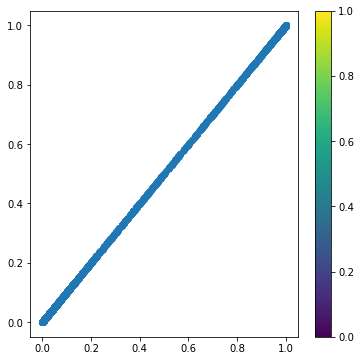

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(val_decode[:, :], val_decode[:, :])
plt.colorbar()
plt.show()

In [31]:
val_predict = val_decode.round()
val_predict

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [32]:
"""val_predict = np.where(val_decode > 0.5, 1, 0)
val_predict"""

'val_predict = np.where(val_decode > 0.5, 1, 0)\nval_predict'

In [33]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [34]:
#c_matrix.shape

In [35]:
#c_matrix

In [36]:
print('accuracy : ', accuracy_score(one_hot_val_labels, val_predict))
print('precision : ', precision_score(one_hot_val_labels, val_predict, average='micro'))
print('recall : ', recall_score(one_hot_val_labels, val_predict, average='micro'))
print('f1 : ', f1_score(one_hot_val_labels, val_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_val_labels, val_predict))

accuracy :  0.7540106951871658
precision :  0.8949930458970793
recall :  0.7988826815642458
f1 :  0.844211216792391
------------------------
hamming_loss :  0.0019390129403600441


In [37]:
val_predict_df = pd.DataFrame(val_predict)
val_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
#val_predict_df.to_excel('./val_latent_vector.xlsx')

### test data

In [39]:
test_encode = encoder.predict(one_hot_test_labels)
test_encode

array([[3.1092575 , 0.02804472, 4.2389445 , ..., 2.4731076 , 2.571003  ,
        2.881237  ],
       [5.2829046 , 3.47455   , 1.9438918 , ..., 0.7453276 , 4.6583676 ,
        1.6710093 ],
       [2.5320785 , 1.0857649 , 0.        , ..., 1.2511905 , 5.2288375 ,
        1.1219704 ],
       ...,
       [2.5223908 , 0.9466243 , 1.9106295 , ..., 4.887637  , 0.9712704 ,
        4.1886806 ],
       [4.784645  , 1.6478528 , 2.9496713 , ..., 3.8695664 , 1.1334213 ,
        1.7698432 ],
       [1.0399195 , 3.0653944 , 3.1710703 , ..., 1.9109466 , 4.853198  ,
        0.        ]], dtype=float32)

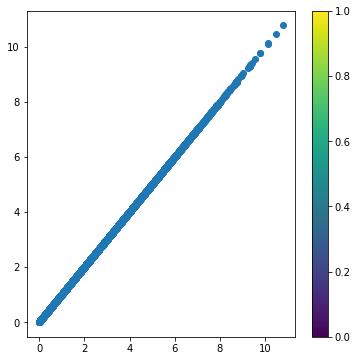

In [40]:
plt.figure(figsize=(6, 6))
plt.scatter(test_encode[:, :], test_encode[:, :])
plt.colorbar()
plt.show()

In [41]:
test_encode_df = pd.DataFrame(test_encode)
test_encode_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.109257,0.028045,4.238945,0.0,5.069359,1.314262,5.194553,0.798135,3.708004,2.800227,3.386113,4.885478,4.414466,2.473108,2.571003,2.881237
1,5.282905,3.474550,1.943892,0.0,4.550474,2.491935,1.962530,2.464110,3.346422,4.429030,5.636681,0.748188,3.827006,0.745328,4.658368,1.671009
2,2.532079,1.085765,0.000000,0.0,3.125017,5.070262,4.069159,2.666471,3.644066,3.406696,3.163209,4.850121,1.080277,1.251191,5.228837,1.121970
3,4.355028,1.190150,2.025228,0.0,4.644761,4.315497,3.297051,2.216343,3.499756,3.984107,5.204399,4.898787,5.794420,0.995206,6.614484,3.523954
4,4.602422,4.929533,1.838855,0.0,4.579864,4.315188,3.344093,1.428097,1.534162,3.746244,2.821949,6.012256,6.229089,0.841923,6.791606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,1.457492,0.000000,0.483540,0.0,2.793102,3.870427,2.918499,2.596539,1.040515,4.695660,3.531010,3.542725,1.514029,1.906495,3.157008,4.240695
931,4.023750,0.518679,2.612715,0.0,6.207034,1.371960,3.777225,0.737728,3.237675,4.472548,5.219839,4.296143,3.230532,2.287765,2.882447,4.646954
932,2.522391,0.946624,1.910630,0.0,2.051934,5.164859,1.514896,1.940813,0.000000,3.530931,3.769886,2.217740,2.154315,4.887637,0.971270,4.188681
933,4.784645,1.647853,2.949671,0.0,6.695910,6.294489,2.261566,2.449160,3.040078,5.971372,4.842612,5.574839,3.312207,3.869566,1.133421,1.769843


In [42]:
test_encode_df.to_excel('./rae_ls16_{}_latent_vector_test.xlsx'.format(version))

In [43]:
test_decode = decoder.predict(test_encode)
test_decode

array([[2.2734230e-02, 3.8005193e-05, 9.9955732e-01, ..., 9.3016279e-09,
        3.8240355e-08, 2.1792012e-07],
       [1.4484409e-14, 3.6587451e-09, 2.7248780e-20, ..., 7.7499340e-10,
        5.5348184e-09, 5.0845596e-13],
       [6.4442052e-09, 1.4179810e-05, 2.3448588e-17, ..., 1.7788876e-16,
        1.9951505e-15, 1.3307035e-04],
       ...,
       [2.2857327e-08, 1.2548842e-05, 5.0702488e-07, ..., 1.9555903e-06,
        4.0733167e-14, 3.9263242e-09],
       [5.9131822e-10, 7.4030788e-11, 2.6232783e-10, ..., 9.4941512e-05,
        7.9682536e-09, 2.0304256e-09],
       [1.5118140e-09, 3.9823016e-09, 3.3037189e-16, ..., 2.7279205e-12,
        2.1478336e-11, 5.4421589e-06]], dtype=float32)

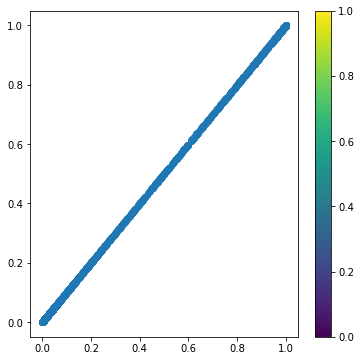

In [44]:
plt.figure(figsize=(6, 6))
plt.scatter(test_decode[:, :], test_decode[:, :])
plt.colorbar()
plt.show()

In [45]:
test_predict = test_decode.round()
test_predict

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [46]:
"""test_predict = np.where(test_decode > 0.5, 1, 0)
test_predict"""

'test_predict = np.where(test_decode > 0.5, 1, 0)\ntest_predict'

In [47]:
#c_matrix = multilabel_confusion_matrix(one_hot_test_labels, predicted_label)

In [48]:
#c_matrix.shape

In [49]:
#c_matrix

In [50]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='micro'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='micro'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='micro'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.7379679144385026
precision :  0.8704560475875743
recall :  0.7928958458759783
f1 :  0.8298676748582231
------------------------
hamming_loss :  0.0022043515532514184


In [51]:
print('accuracy : ', accuracy_score(one_hot_test_labels, test_predict))
print('precision : ', precision_score(one_hot_test_labels, test_predict, average='samples'))
print('recall : ', recall_score(one_hot_test_labels, test_predict, average='samples'))
print('f1 : ', f1_score(one_hot_test_labels, test_predict, average='samples'))
print('------------------------')
print('hamming_loss : ', hamming_loss(one_hot_test_labels, test_predict))

accuracy :  0.7379679144385026
precision :  0.8955589508530686
recall :  0.8637967914438502
f1 :  0.8705216827141962
------------------------
hamming_loss :  0.0022043515532514184


C:\Users\user\.conda\envs\mlc\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
test_predict_df = pd.DataFrame(test_predict)
test_predict_df

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,257,258,259,260,261
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#test_predict_df.to_excel('./test_latent_vector.xlsx')